# Introduction

So we've just looked at generalized linear models or GLMs as generalizations of linear models which are typical anovas..but to respsones that are not normal and that allow us to handle repsonse distributions like poisson or multinomial or ordinal responses. 

As we've said, the linear model generalizes to the generalized linear model. But this generalized linear model can only handle between-subject's data. Now we're going to introduce what are called mixed models. And there is a linear mixed model. We'll look at its generalization, the generalized linear mixed model. 

And both of these analyses can handle both between and within subjects data, allowing us to handle data with repeated measures, which in interaction design and HCI studies, repeated measures come up all the time. So these are very powerful models. 

<img src="materials/week9/001.JPG">

Let's set our scenario and then we'll describe more what it means to be a mixed model. Our scenario is that we'll return to our data for our mobile text entry study, where we had people using 2 different keyboards in 3 different postures (sitting, standing, and walking). You might recall we had 24 subjects, they were in 2 conditions of keyboard (iphone and galaxy). 

They were in 3 postures (sit, stand, and walk). Keyboard was between subjects and postures was within subjects. 

And they entered 20 phrases, which we might call a trial which is a general term meaning a sort of a single data point that we're going to capture from a subject. 

Before we averaged their words per minute and their error rate. But now, we're going to keep all 20 phrases and thus brings us to 1440 data points for this datatable that we can analyze. So we're keeping all of the individual phrases that we measure, and not averaging over them anymore. 

<img src="materials/week9/002.JPG">

So that's our scenario and we'll return to analyze that data shortly. But to do that, we're going to have to introduce the concept of random effects and what we've been working with all along but havent' called them this yet are fixed effects. When you have both of this in a statistical model, you have the "mixed" term for the mixed model which is their generalized linear mixed model. We're mixing fixed effects and random effects. 

<img src="materials/week9/003.JPG">

So what are these? 

Fixed effects are the factors of interest that we manipulate in a study. There have been the kinds of variables, the independent variables, we've looked at all along. Keyboard and posture are fixed effects. They're the factors in our study. 

Random effects - we haven't considered yet. Random effects have a very special meaning and allow us to use linear mixed and generalized linear mixed models. Random effects are factors whose levels were sampled randomly from a larger population about which we wish to generalize but whose specific level values we actually don't care about. 

So in interaction design and HCI studies, subject is a classic random effect. The subjects are sampled from a population of subjects we wish to generalize about and we don't care about the specific levels of the subject factor. They're coded 1, 2, 3, and so son for however many subjects we may have. Actually, we had 24 subjects in this particular study so we'll go with 24. But we don't care about the specific levels. We just care that we have a pool of subjects. They are a classic random effect and by makign them a random effect in our models with otherwise fixed effects, we have linear mixed models and if we need them, generalized linear mixed models for different kinds of responses. 

<img src="materials/week9/004.JPG">

Subject included in the model allows us to correlate measures across the same subjects, across different rows in our data table. And that's how we can handle within subject's design using mixed models. 

Mixed models have a number of advantages and they're very powerful indeed. They can have some missing data cells. If you drop data, you can still use a mixed model approach to analyze that data and it doesn't thwart your study to have some empty cells in your data table. You can also better handle unbalanced designs where you have different amounts of data in different conditions. There's also no longer a Mauchly's sphericity test needed anymore. We don't worry about the sphericity property. We just model the covariance in the data directly. 

Remember that sphericity is the situation where variances of the differences between all combinations of levels of a within subject factor are equal or close to equal. Now, we care about that but we can model sphericity however form it takes. Whatever form it takes directly. 

What are the disadvantages of using mixed models? I just cited 3 advantaes but what are the disadvantages? Well, they're just computationally more intensive. Sometimes, they can take longer to run. They also return larger denominator degrees of freedom, what we've seen as the DF residuals or DF denominator. 

Now to do this kind of analysis where we have each of our 20 trials, there's one more item that we have to consider and this comes up a lot with mixed models and that is the idea of nesting. In particular, the idea of nested effects. And it's a practical matter to consider when using mixed models. 

So what's a nested effect?

Nesting comes into play when the levels of a factor shouldn't be pooled just by their label alone. When you're doing any kinds of ANOVA analysis, the levels of a factor are grouped together and calculations are made. For example - for all the set data, stand data, lock data, all the iphone data, or galaxy data. 

In the case of trial as a factor, we'll just encode trial just as a number for the 20 trials within each of the sit, stand, walk levels and each of the iphone and galaxy combinations there. Trial takes on values of 1 to 20 throughout the table. But we don't have any special meaning to pooling all of the data for variance calculations for all the trials numbered 1 or 2 or 3. Those levels are that important. And we don't want to pool across all levels 1, 2, 3 because trial number 1 while sitting using an iphone is very different than trial number 1 while standing using galaxy. 

<img src="materials/week9/005.JPG">

So we nest trial within posture and keyboard. If we're used to dot notation from certain programming languages like java, you can think of it as a kind of a keyboard.posture.trial where trial is kind of nested. So for example - we would pool values across iphone while sitting and pool all those trial ones and twos and so forth. But within iphone and sitting. 

In general, when you have a factor like a trial where it's not meaningful to consider them in isolation. Trial 1 by itself doesn't mean very much. You might be in a situation where you want to nest. And that will allow you to get a more accurate response in your results. 

# Analyzing a linear mixed model

We're going to revisit our mobile text entry data but now with all 1440 trials included. No longer summarizing, averaging over our 20 text entry phrases in each keyboard and posture situation. We're going to use mixed effects models. Mixed effect models have random and fixed effects. 

Linear mixed models extend our linear models, which were the fixed-effects ANOVAs that we've been doing but they can have random effects, which allow us to model within subjects' factors, using subject as a random effect. 

Then we'll move on to generalized linear mixed models which can do everything that the generalized linear models do but now have random effects and can therefore handle within subjects data. 

Make sure that you don't confused mixed factorial ANOVA (which have between and within subjects factors) with mixed effect models (which are about fixed and random effects). 


In [39]:
# linear mixed models (LMM) do everything Linear Models (LM) do 
# but can have both fixed and random effects. Random effects allow us
# to handle within-Ss factors by modeling "Subject" as a random effect. 
# Generalized linear mixed models (GLMM) do everything Generalized Linear Models (GLM) do
# but also can have both fixed and random effects. 
# LMMs and GLMMs are called "mixed effects models". 

In [8]:
# Linear mixed model (LMM) on words per minute

mbltxttrials <- read.csv("materials/mbltxttrials.csv")
head(mbltxttrials, 20)

Subject,Keyboard,Posture,Posture_Order,Trial,WPM,Error_Rate
1,iPhone,Sit,1,1,21.05,0.01
1,iPhone,Sit,1,2,15.95,0.02
1,iPhone,Sit,1,3,21.51,0.01
1,iPhone,Sit,1,4,24.37,0.00
1,iPhone,Sit,1,5,22.58,0.05
1,iPhone,Sit,1,6,24.82,0.06
1,iPhone,Sit,1,7,24.35,0.00
1,iPhone,Sit,1,8,17.39,0.03
1,iPhone,Sit,1,9,20.76,0.03
1,iPhone,Sit,1,10,15.98,0.03


In [40]:
library("dplyr")

mbltxttrials %>%
    filter(Subject == 1)

Subject,Keyboard,Posture,Posture_Order,Trial,WPM,Error_Rate
1,iPhone,Sit,1,1,21.05,0.01
1,iPhone,Sit,1,2,15.95,0.02
1,iPhone,Sit,1,3,21.51,0.01
1,iPhone,Sit,1,4,24.37,0.00
1,iPhone,Sit,1,5,22.58,0.05
1,iPhone,Sit,1,6,24.82,0.06
1,iPhone,Sit,1,7,24.35,0.00
1,iPhone,Sit,1,8,17.39,0.03
1,iPhone,Sit,1,9,20.76,0.03
1,iPhone,Sit,1,10,15.98,0.03


We have the posture order column to check for order effects of our within subject factor posture to make sure that our full counter balancing worked. We have now a trial column 1 to 20. And so, as the posture changes for the first subject using an iphone, the posture changes to standing from sitting. Now the trial start over from 1 to 20 again. And so, we're going to nest trial in posture and keyboard as we discussed previously. Then we have our 2 measure columns, WPM and Error Rate. 

We'll analyze words per minute with a linear mixed model and error rate because errors are poisson distributed with a generalized linear mixed model. 

It looks like each subject does 20 trials of a keyboard-posture combination. Each subjects does one keyboard type and all 3 posture types

In [16]:
mbltxttrials$Subject <- as.factor(mbltxttrials$Subject)
mbltxttrials$Posture_Order <- as.factor(mbltxttrials$Posture_Order)
mbltxttrials$Trial <- as.factor(mbltxttrials$Trial)

summary(mbltxttrials)

    Subject       Keyboard    Posture    Posture_Order     Trial     
 1      :  60   Galaxy:720   Sit  :480   1:480         1      :  72  
 2      :  60   iPhone:720   Stand:480   2:480         2      :  72  
 3      :  60                Walk :480   3:480         3      :  72  
 4      :  60                                          4      :  72  
 5      :  60                                          5      :  72  
 6      :  60                                          6      :  72  
 (Other):1080                                          (Other):1008  
      WPM          Error_Rate     
 Min.   : 0.63   Min.   :0.00000  
 1st Qu.:17.47   1st Qu.:0.02000  
 Median :21.21   Median :0.03000  
 Mean   :20.21   Mean   :0.03381  
 3rd Qu.:23.98   3rd Qu.:0.05000  
 Max.   :36.39   Max.   :0.15000  
                                  

In [19]:
# explore the WPM data
library("plyr")

ddply(mbltxttrials, ~ Keyboard * Posture, function(data) summary(data$WPM))

Keyboard,Posture,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
Galaxy,Sit,18.66,22.5875,23.970,23.90979,25.0450,29.25
Galaxy,Stand,13.52,19.0900,21.230,21.19183,23.1275,32.98
Galaxy,Walk,0.63,8.5850,11.785,12.06554,15.7450,25.36
iPhone,Sit,9.85,18.8050,20.880,20.95750,22.8475,28.55
iPhone,Stand,10.76,21.0925,23.985,23.91629,26.1825,36.39
iPhone,Walk,3.76,15.5975,19.000,19.23408,22.2700,34.90


In [20]:
ddply(mbltxttrials, ~ Keyboard * Posture, summarise, 
         WPM.mean = mean(WPM),
         WPM.sd = sd(WPM))

Keyboard,Posture,WPM.mean,WPM.sd
Galaxy,Sit,23.90979,1.947672
Galaxy,Stand,21.19183,2.977103
Galaxy,Walk,12.06554,4.905870
iPhone,Sit,20.95750,2.995498
iPhone,Stand,23.91629,4.230597
iPhone,Walk,19.23408,4.885713


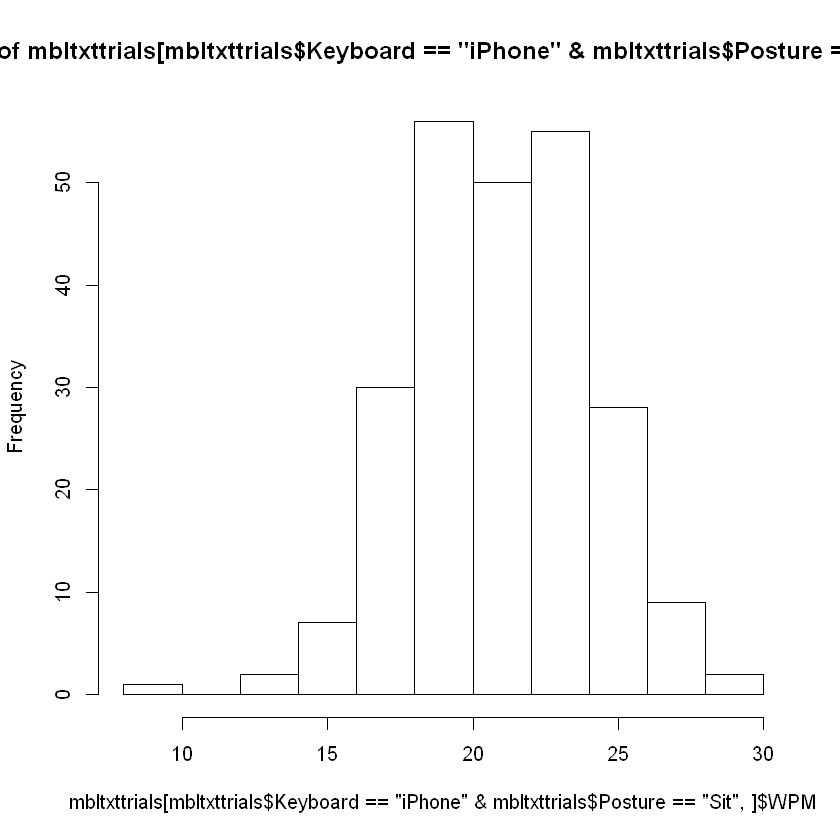

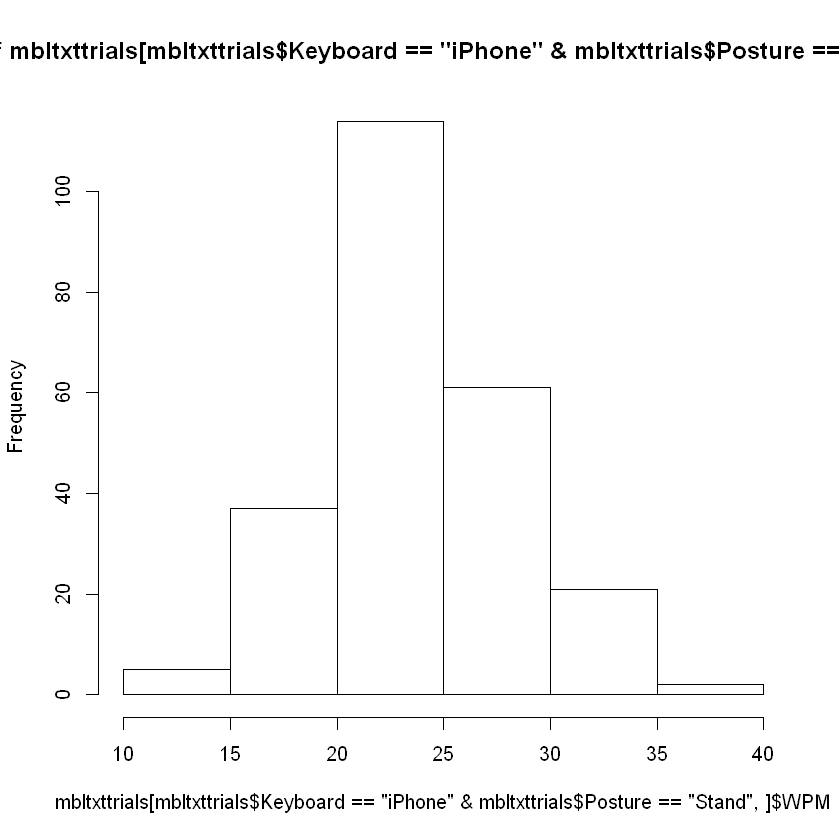

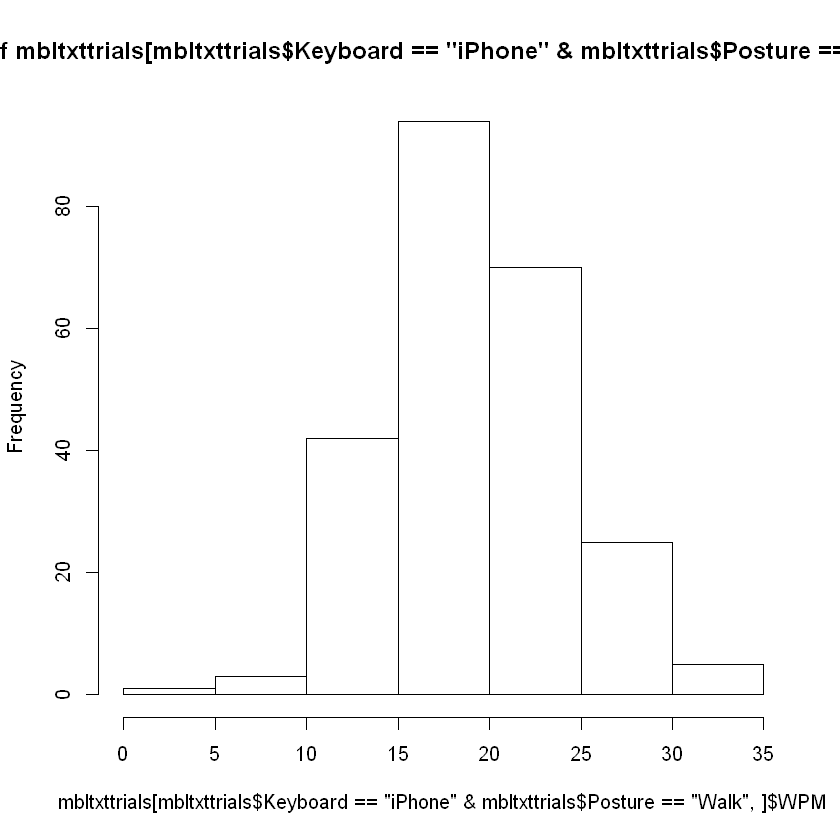

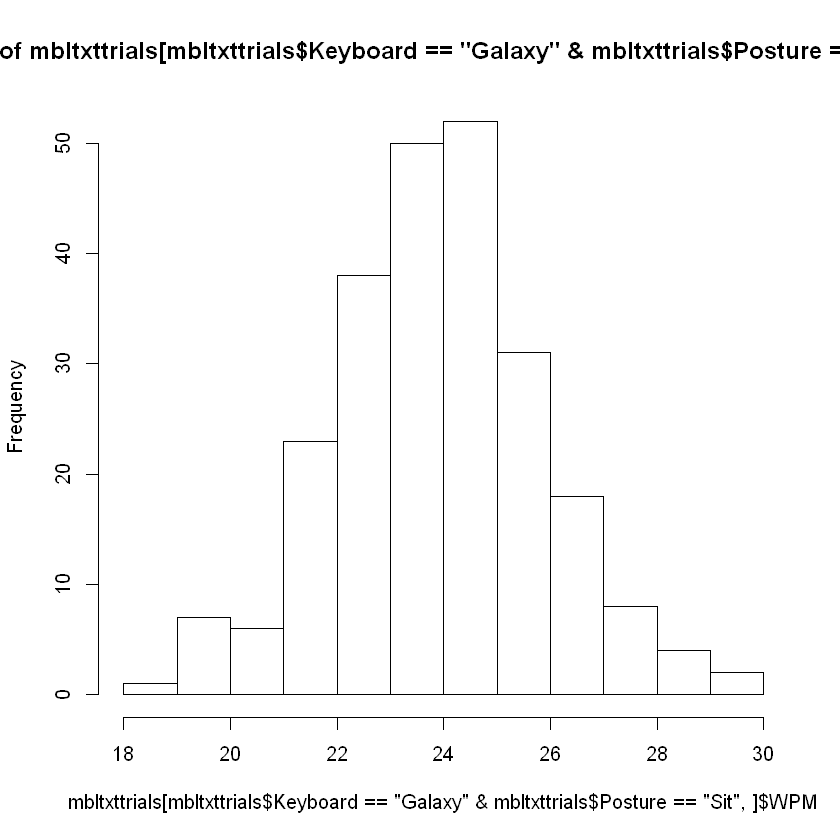

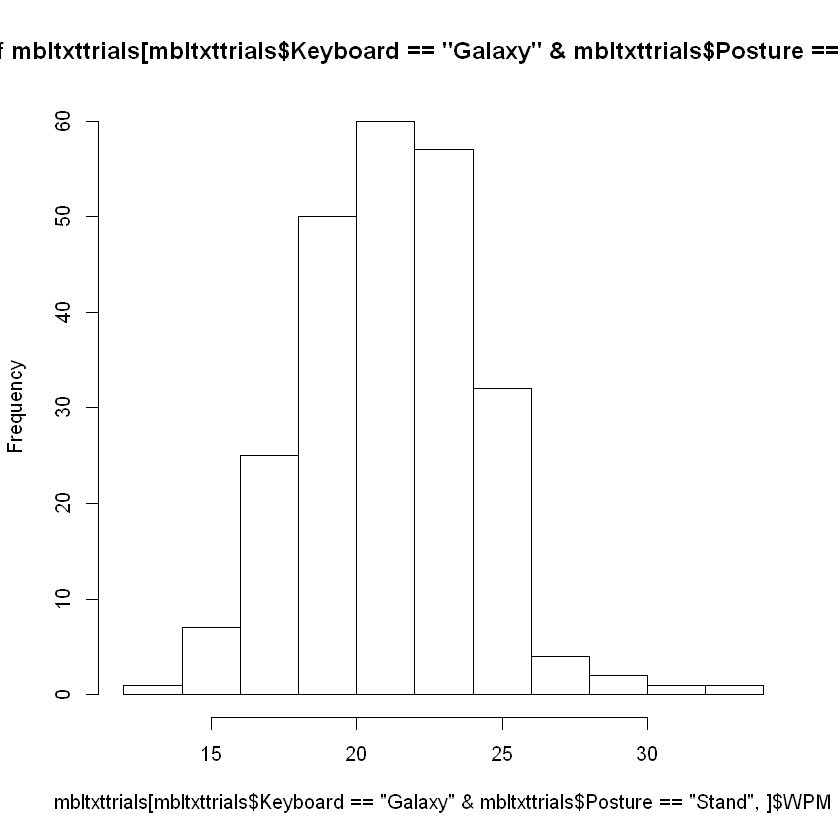

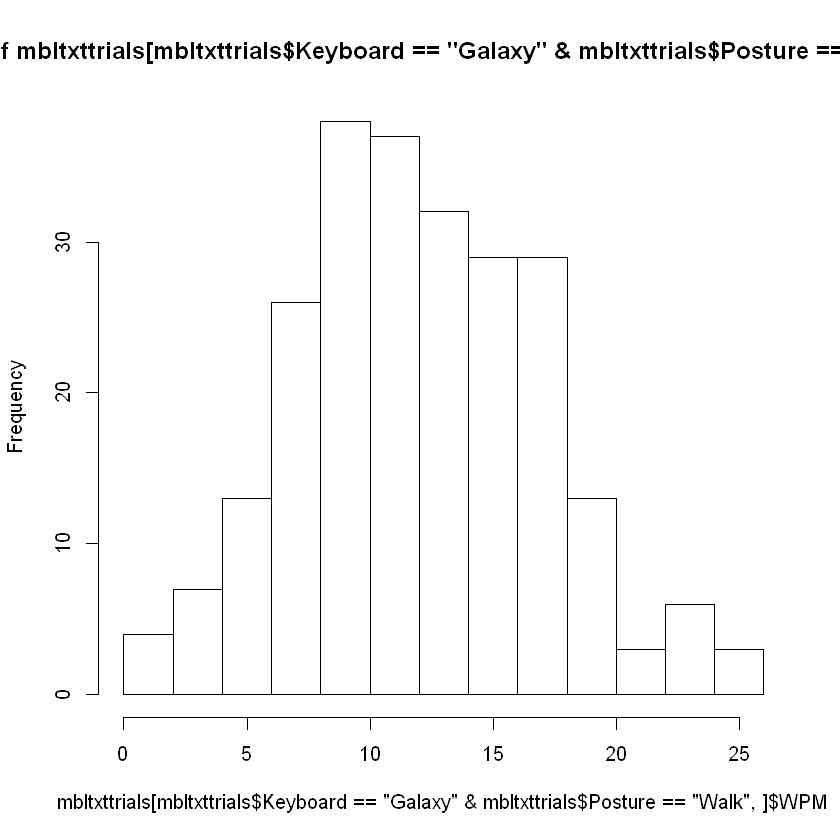

In [21]:
# histogram for the 2 factors

hist(mbltxttrials[mbltxttrials$Keyboard == "iPhone" & mbltxttrials$Posture == "Sit",]$WPM)
hist(mbltxttrials[mbltxttrials$Keyboard == "iPhone" & mbltxttrials$Posture == "Stand",]$WPM)
hist(mbltxttrials[mbltxttrials$Keyboard == "iPhone" & mbltxttrials$Posture == "Walk",]$WPM)
hist(mbltxttrials[mbltxttrials$Keyboard == "Galaxy" & mbltxttrials$Posture == "Sit",]$WPM)
hist(mbltxttrials[mbltxttrials$Keyboard == "Galaxy" & mbltxttrials$Posture == "Stand",]$WPM)
hist(mbltxttrials[mbltxttrials$Keyboard == "Galaxy" & mbltxttrials$Posture == "Walk",]$WPM)

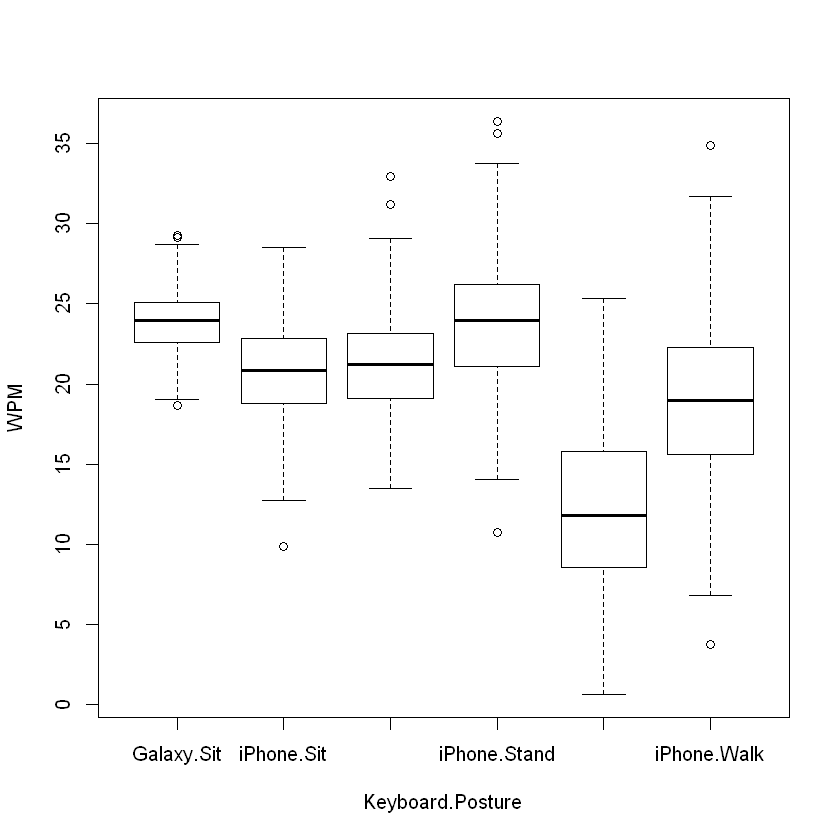

In [22]:
boxplot(WPM ~ Keyboard * Posture, data=mbltxttrials, xlab="Keyboard.Posture", ylab="WPM") # boxplots

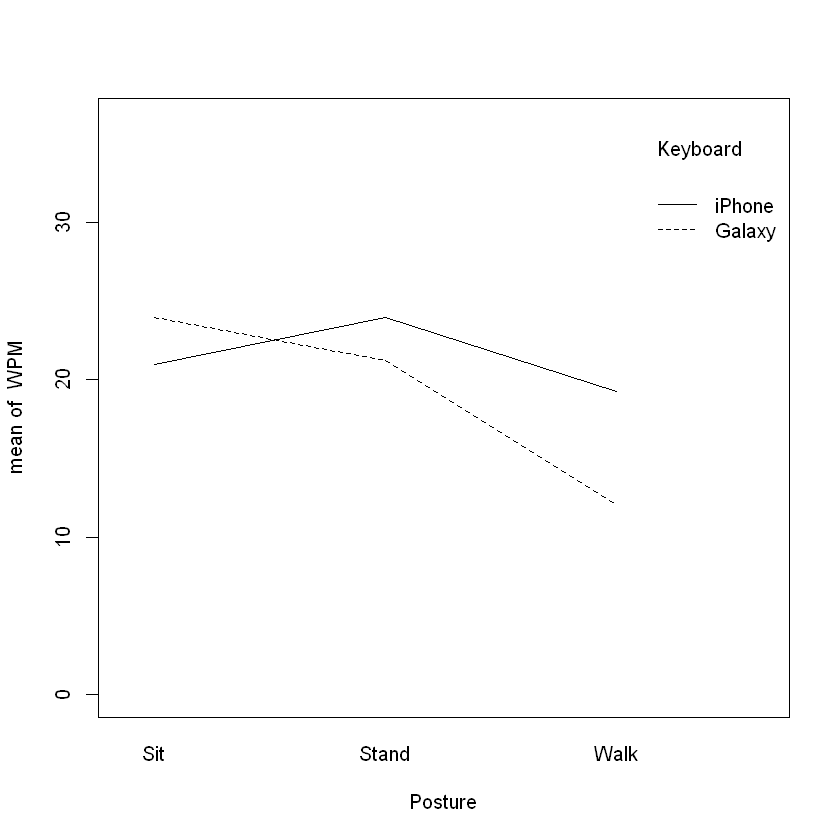

In [23]:
with(mbltxttrials, interaction.plot(Posture, Keyboard, WPM, ylim=c(0, max(mbltxttrials$WPM)))) # interaction?

In [28]:
# libraries for LMMs
library("lme4") # for lmer
library("lmerTest")
library("car") # for Anova

We need to set some contrasts for each of these factors to be sum to zero contrasts. They really mean that when we do pairwise comparisons, we compare each of the levels evenly to each other. 

In [29]:
# set sum to zero contrasts for the anova calls

contrasts(mbltxttrials$Keyboard) <- "contr.sum"
contrasts(mbltxttrials$Posture) <- "contr.sum"
contrasts(mbltxttrials$Posture_Order) <- "contr.sum"
contrasts(mbltxttrials$Trial) <- "contr.sum"

Then we'll move into the test of an order effect. So we want to make sure we counterbalanced posture order properly and that it doesn't have an order effect working. 

So we'll run our trial, our linear mixed model, with keyboard as a fixed effect.

In [41]:
# LMM order effect test
# Keyboard, posture order, keyboard:posture order
# and trial are all fixed effects. 
# trial is nested within keyboard, posture_order.
# subject is a random effect. 

m <- lmer(WPM ~ (Keyboard * Posture_Order)/Trial + (1|Subject), data=mbltxttrials)
Anova(m, type=3, test.statistic="F")

,F,Df,Df.res,Pr(>F)
(Intercept),1.925211e+04,1,22,7.210305e-34
Keyboard,6.305843e+01,1,22,6.674588e-08
Posture_Order,8.445125e-01,2,1298,4.300028e-01
Keyboard:Posture_Order,4.627457e-02,2,1298,9.547813e-01
Keyboard:Posture_Order:Trial,4.828560e-01,114,1298,9.999989e-01


In the results, we can see that we have a significant p-value for keyboard. Thankfully, posture order is not statistically significant. And neither is posture order interacting with keyboard. Neither is the 3 way interaction with trial. So what this tells us is that we did adequately counterbalance and the order of presentation of the postures did nto in fact affect our data so that's good. 

So now we can move forward with some confidence to do the linear mixed model on words per minute. That's the response variable that we care about. 

We have the same model but this time, we're just encoding posture directly (not posture order). We can run our linear mixed model with that. A subject is again a random effect, which gives us the ability to model the within subjects aspect of posture. And we have trial nested within keyboard in posture.

In [34]:
# main LMM test on WPM
# Keyboard, posture, keyboarD:posture and trial are 
# all fixed effects. Trial is nested within keyboard,
# posture. Subject is a random effect. 

m <- lmer(WPM ~ (Keyboard * Posture)/Trial + (1|Subject), data=mbltxttrials)
Anova(m, type=3, test.statistic="F")

,F,Df,Df.res,Pr(>F)
(Intercept),3.798468e+04,1,22,4.112447e-37
Keyboard,1.244151e+02,1,22,1.596642e-10
Posture,5.111322e+02,2,1298,1.911868e-164
Keyboard:Posture,2.105635e+02,2,1298,6.315523e-80
Keyboard:Posture:Trial,9.132851e-01,114,1298,7.288184e-01


We can see here that keyboard is statistically significant. There's a difference in keyboard (we also found that previously in previous modules). There's a difference in posture (also found previously). And there's a significant keyboard posture interaction. All of which we discovered from our summarized data previously. But now, look at our degrees of freedom for posture and keyboard posture. The numerator degrees of freedom are 2 and the denominator is 1298. So that's retaining a large number of denominator degrees of freedom that we would report in our F Statistic. But don't be alarm as that's typical for linear mixed models. 

Incidentally, you might be wondering...well, if subjects were sampled randomly from a population that we want to generalize about, and we don't care about the specific levels like subject. That is the specific subjects themselves. Isn't that sort of true of trial as well? Isn't trial kind of a random effect? Possibly if it's sampled from a larger population of possible text entry phrases they might enter. And we don't really care the specific value of trial 1 to 20. The answer is yes - that's a reasonable thing to do and we can create a random effect trial in this fashion as well. 

In [36]:
# we should consider trial to be a random effect 
# and we obtain almost exactly the same results
# but it takes longer to run. 

m <- lmer(WPM ~ Keyboard * Posture + (1|Keyboard:Posture:Trial) + (1|Subject), data=mbltxttrials)
Anova(m, type=3, test.statistic="F")

,F,Df,Df.res,Pr(>F)
(Intercept),37984.6920,1,18.55577,3.464935e-32
Keyboard,124.4152,1,18.55577,1.152387e-09
Posture,514.7359,2,114.00000,8.408654e-58
Keyboard:Posture,212.0481,2,114.00000,3.842065e-39


In light of the overall signficant result, the omnibus test, we can do some pairwise comparisons. We can execute a pairwise comparison among the levels of keyboard and posture. 

Note: df set to 88



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = WPM ~ Keyboard * Posture + (1 | Keyboard:Posture:Trial) + 
    (1 | Subject), data = mbltxttrials)

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Galaxy,Sit - iPhone,Sit == 0       2.9523     0.3520   8.386 5.25e-12 ***
Galaxy,Sit - Galaxy,Stand == 0     2.7180     0.3484   7.802 7.04e-11 ***
Galaxy,Sit - iPhone,Stand == 0    -0.0065     0.3520  -0.018        1    
Galaxy,Sit - Galaxy,Walk == 0     11.8443     0.3484  33.999  < 2e-16 ***
Galaxy,Sit - iPhone,Walk == 0      4.6757     0.3520  13.282  < 2e-16 ***
iPhone,Sit - Galaxy,Stand == 0    -0.2343     0.3520  -0.666        1    
iPhone,Sit - iPhone,Stand == 0    -2.9588     0.3484  -8.493 3.62e-12 ***
iPhone,Sit - Galaxy,Walk == 0      8.8920     0.3520  25.259  < 2e-16 ***
iPhone,Sit - iPhone,Walk == 0      1.7234     0.3484   4.947 1.08e-05 ***
Galaxy,Stand - iPhone,Stand == 0  -2.7245     0.3520  -7.739 7.88e-1

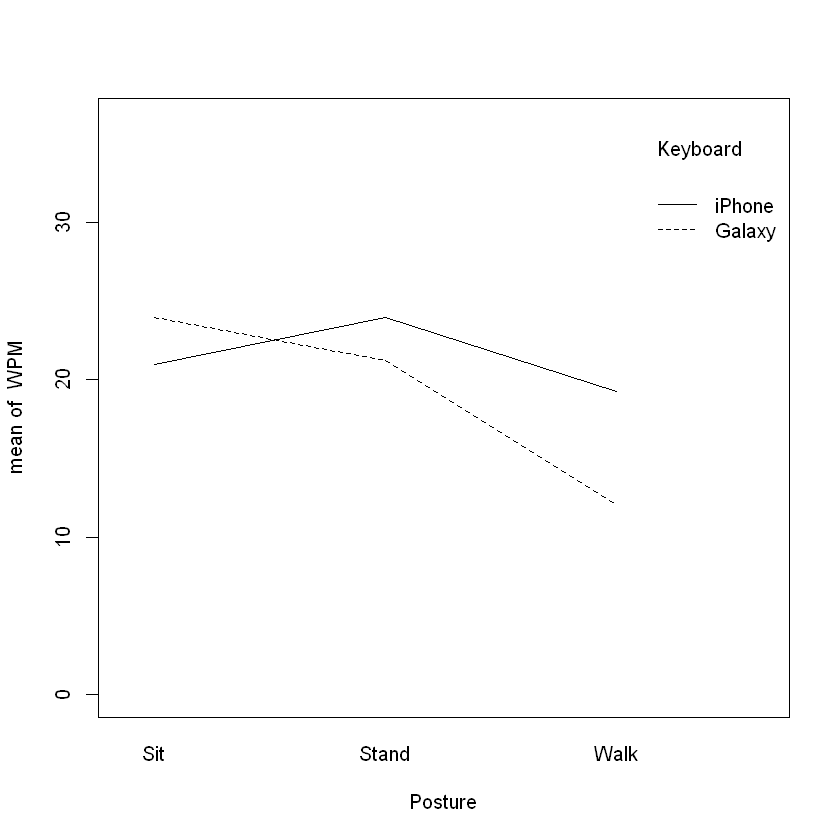

In [38]:
# perform post-hoc pairwise comparisons
library("multcomp")
library("lsmeans")

summary(glht(m, lsm(pairwise ~ Keyboard * Posture)), test=adjusted(type="holm"))
with(mbltxttrials, interaction.plot(Posture, Keyboard, WPM, ylim=c(0, max(mbltxttrials$WPM))))

There's a quite a few combinations so we end up with a little bit longer output. We can see here that we have all of the pairwise comparisons available to us across all of these levels in our interaction plot. 

We want to notice a few things here. All of these pairwise differences seem significant and they are corrected for multiple comparison and that's very important when doing this many of them. 

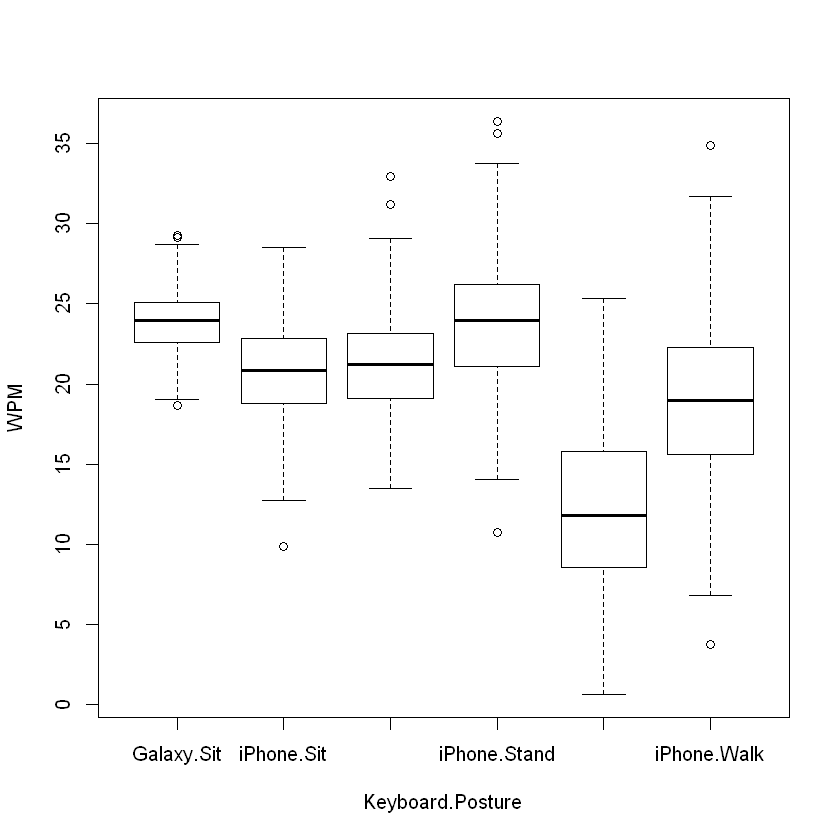

In [42]:
boxplot(WPM ~ Keyboard * Posture, data=mbltxttrials, xlab="Keyboard.Posture", ylab="WPM") # boxplots